# **Dataset: Board Games**

Proyecto que consiste en analizar un conjunto de datos de juegos de mesa (board games) con el objetivo de generar un modelo de aprendizaje automático. Además, este modelo será de clasificación para indicarle al usuario qué juegos podrá buscar.

Kaggel: https://www.kaggle.com/datasets/sujaykapadnis/board-games.

## **Fase 1: Comprensión de los datos**

### 1.1. Contexto del dataset:

Se obtuvo este dataset desde la plataforma de Kaggle, donde ofrece suficiente información para determinar qué juegos de mesa podrá jugar el usuario a partir del género o categoría que conserven estos juegos.

A continuación, se expone la siguiente información resumida del dataset:

* Contiene un total de 10 mil datos de diferentes juegos de mesa que se venden en el mercado.

* Se presentan un total de 22 características que indican qué tipo de juego es, cantidad de jugadores, nombre, descripción, etc.

* Existe una gran variedad de categorías asociadas a los juegos de mesa.

Por otro lado, los atributos registrados en el dataset tienen la siguiente descripción:

* **Description:** parrafo que describe al juego de mesa.

* **PlayTime:** tiempo de juego promedio - INTEGER

* **MaxPlayers:** máximo de jugadores recomendado - INTEGER

* **MaxPlayTime:** máximo tiempo de juego recomendado (min) - INTEGER

* **MinPlayers:** mínimo de jugadores recomendados - INTEGER

* **MinPlayTime:** mínimo tiempo de juego recomendado (min) - INTEGER

* **MinAge:** edad mínima recomendada - INTEGER

* **Artist:** artista de arte de juego.

* **Category:** categorías del juego.

* **YearPublished:** año en que fue publicado - INTEGER

* **Publisher:** persona(s) que publicó o creó el juego.

* **Average_rating:** calificación media del juego (1-10) - INTEGER


### **1.2. Explorando el dataset**

In [8]:
# Importando librerías de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [9]:
# Creando clase en Python para manejar y mostrar información de un dataset
class Dataset():

  # Atributos
  file_dataset = None

  # Constructor
  def __init__( self, pathFile ):
    self.file_dataset = pd.read_csv( pathFile, header = 0 ) # Cargando el dataset

  # Métodos
  def mostrar_dataset( self, value = 5 ):
    return self.file_dataset.head( value ) # Muestra cierta cantidad de datos al inicio

  def informacion_dataset( self ):
    return self.file_dataset.info() # Muestra la meta data del dataset

  def datos_nulos_dataset( self ):
    return self.file_dataset.isnull().sum() # Revisando cantidad de datos nulos

In [10]:
# Creando clase para manejar gráficas para los dataset
class GraphicDataset():

  # Atributos

  # Constructor

  # Métodos
  def grafica_barras( self, ancho, altura, valoresX, valoresY, Color, tituloGrafica, tituloEjeX, tituloEjeY ):
    fig, ax = plt.subplots( figsize = (ancho, altura) ) # Creando lienzo para la gráfica
    sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras
    ax.set_title( tituloGrafica ) # Título del gráfico
    ax.set_xlabel( tituloEjeX ) # Título del eje X
    ax.set_ylabel( tituloEjeY ) # Título del eje Y
    plt.show() # Mostrando gráfico

  def grafica_barras_vertical( self, ancho, altura, valoresX, valoresY, tituloGrafica, tituloEjeX, tituloEjeY ):
    fig = plt.figure( figsize = (ancho, altura) ) # Creando lienzo para la gráfica
    plt.barh( valoresX, valoresY, color = ["#17962e", "#0c3661"] ) # Creando gráfica de barras vertical
    plt.xlabel( tituloEjeX ) # Título del gráfico
    plt.ylabel( tituloEjeY ) # Título del eje X
    plt.title( tituloGrafica )  # Título del eje Y
    plt.show() # Mostrando gráfico

In [11]:
"""
Instanciando un objeto de la clase Dataset
También se instancia un objeto para crear gráficas para el dataset
"""
boardGames = Dataset("/content/board_games.csv")
graphics = GraphicDataset()

In [12]:
# Observando datos iniciales del dataset
boardGames.mostrar_dataset(5)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [13]:
# Revisando metadata del dataset
boardGames.informacion_dataset()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [14]:
# Revisando cuántos datos nulos tiene cada atributo
boardGames.datos_nulos_dataset()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

[  5   4   6   2   7   8  16  15   3  10  12   9   0 100  20  24  99  18
   1  33  50  13  36  64  30 362  52  14  42  32 999  31  22  17  11  68
  21  34  25  40 104  41 200  75  61  47 127  38]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


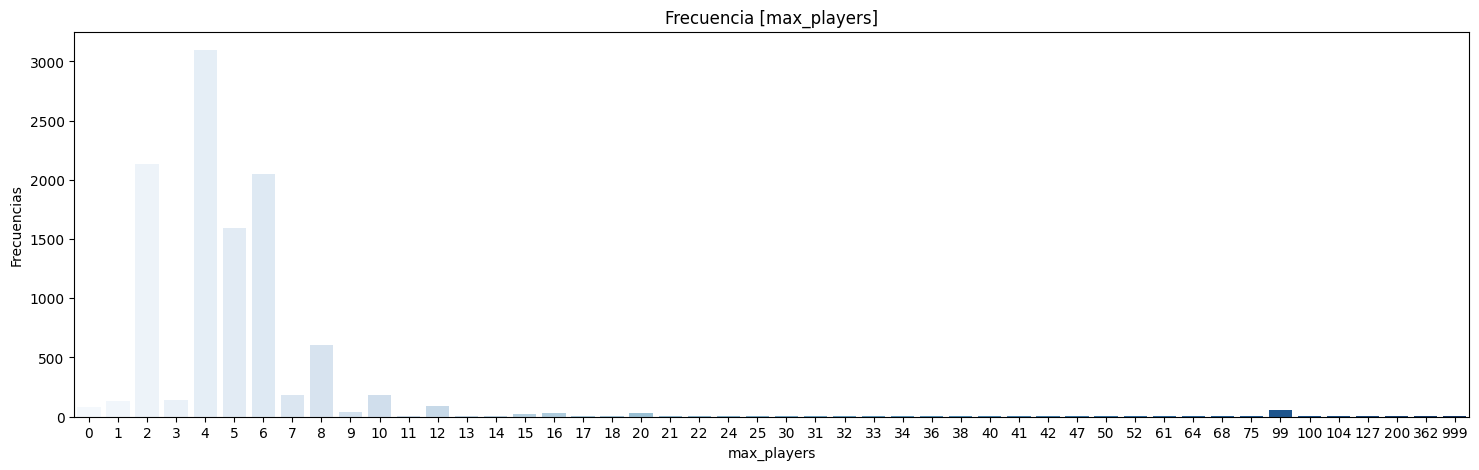

In [15]:
# Revisando atributo "max_players"
atributo_maxPlayers = boardGames.file_dataset['max_players']

frecuencias = atributo_maxPlayers.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_maxPlayers.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [max_players]", "max_players", "Frecuencias" )

[14 12 10  8 13  9 18 16  6 11  0  7  4  5 15  3 17 21 25 26  2 42]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


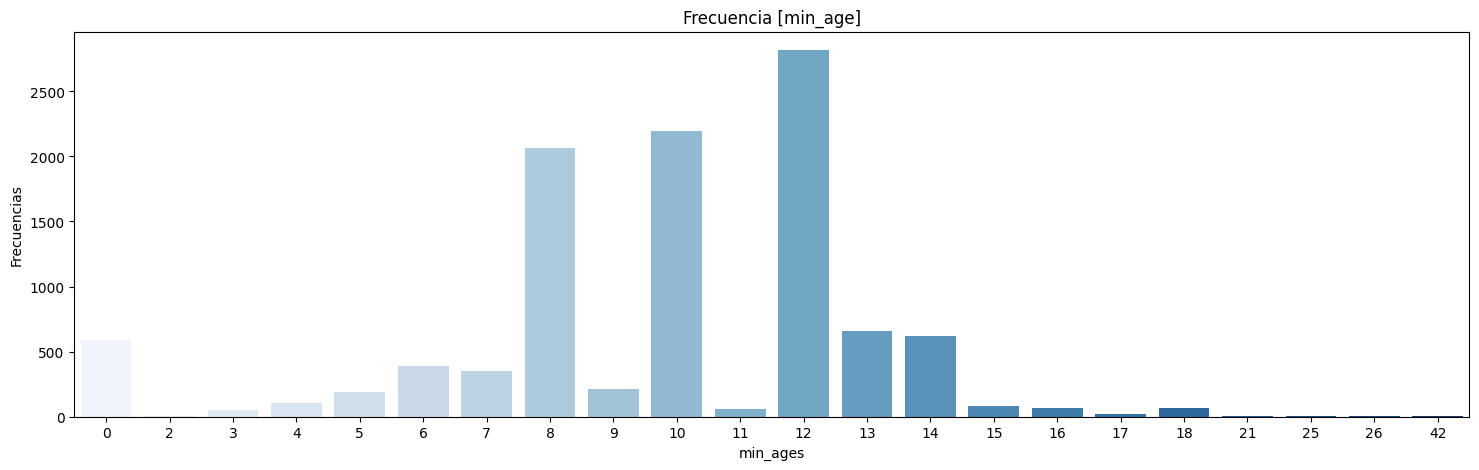

In [16]:
# Revisando atributo "min_age"
atributo_minAge = boardGames.file_dataset['min_age']

frecuencias = atributo_minAge.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_minAge.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [min_age]", "min_ages", "Frecuencias" )

[1986 1981 1998 1992 1964 1989 1978 1993 1997 1999 1995 1977 1996 1994
 1991 1988 1979 1984 1987 1975 1982 1980 1990 1974 1972 1983 1959 1985
 1965 1967 1973 1958 2000 1954 1971 1976 1966 1963 1968 2001 1951 1956
 1970 1969 1955 1962 1961 1957 1960 2002 2012 2003 2004 1952 1953 2011
 1950 2007 2008 2005 2006 2009 2016 2015 2010 2013 2014]


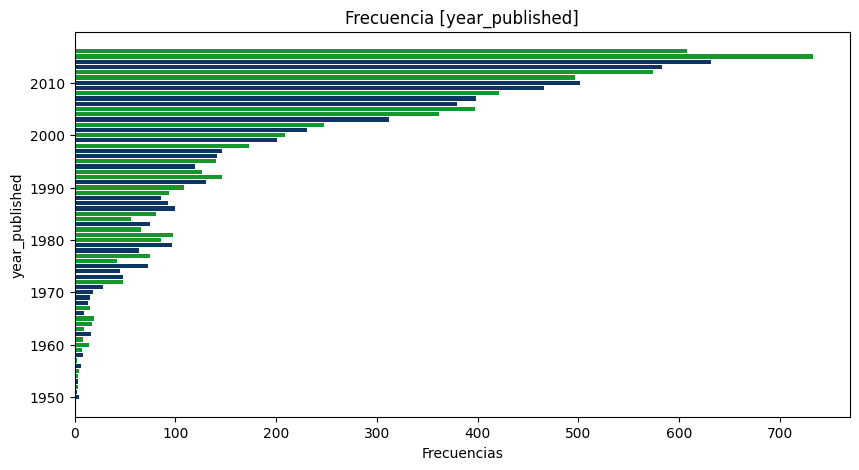

In [17]:
# Revisando atributo "year_published"
atributo_yearPublished = boardGames.file_dataset['year_published']

frecuencias = atributo_yearPublished.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_yearPublished.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras_vertical( 10, 5, frecuencias.index, frecuencias.values, "Frecuencia [year_published]", "Frecuencias", "year_published", )

[8 7 6 5 4 3 2 1 9]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


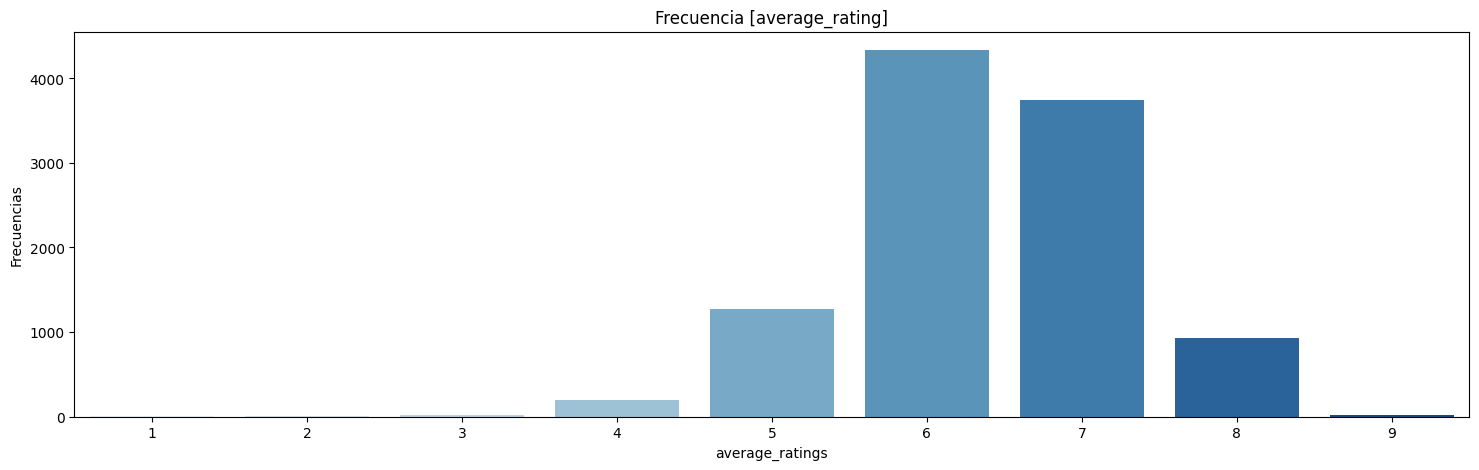

In [18]:
# Revisando atributo "average_rating"
atributo_averageRating = boardGames.file_dataset['average_rating'].round().astype(int) # Redondeado valor y cambiando tipo de dato a int

frecuencias = atributo_averageRating.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_averageRating.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [average_rating]", "average_ratings", "Frecuencias" )

[  240    30    60    90    20   120    45    25     5   360   200   340
   180   300     0    40   150   480    15    75 12000  2480    70    10
  1200   100   210    80  6000  1440   270    35    50   420  4320   960
  3600 60000   720     6  5400  2880  1500   700     1  3000   600    12
  4500  1800    23  2400   105   160   900     2     3    55   222    33
   135 17280   540   500    13   400   140  1000   108    39   750    95
    68    32   125   165   290     4   115   130    42    11    19]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


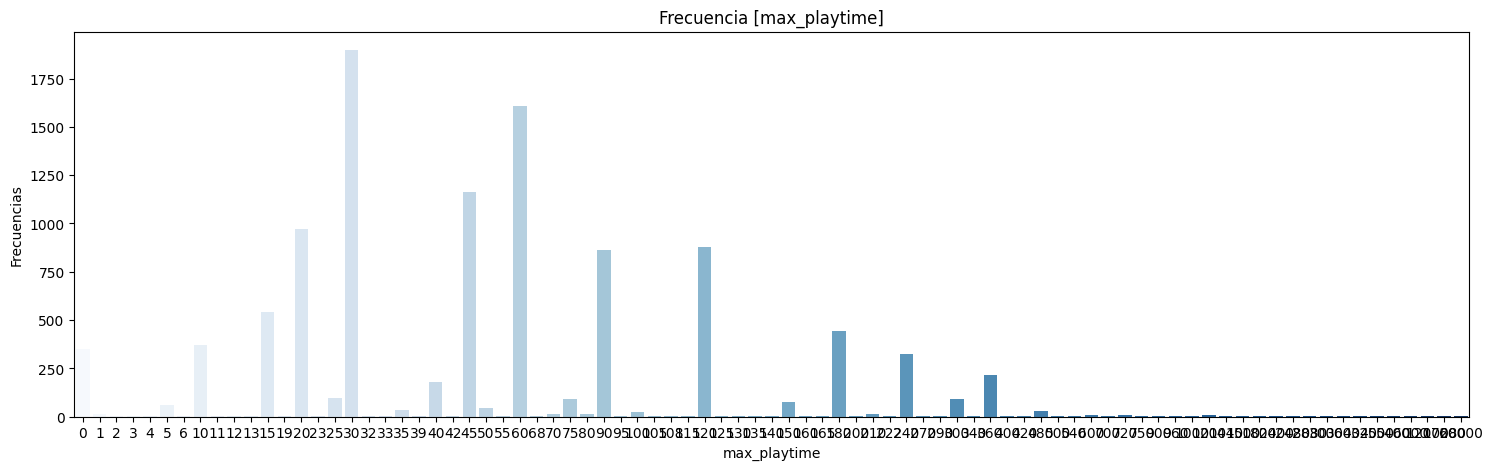

In [19]:
# Revisando atributo "max_playtime"
atributo_maxPlayTime = boardGames.file_dataset['max_playtime']

frecuencias = atributo_maxPlayTime.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_maxPlayTime.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [max_playtime]", "max_playtime", "Frecuencias" )

[3 2 1 4 0 8 6 5 7 9]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


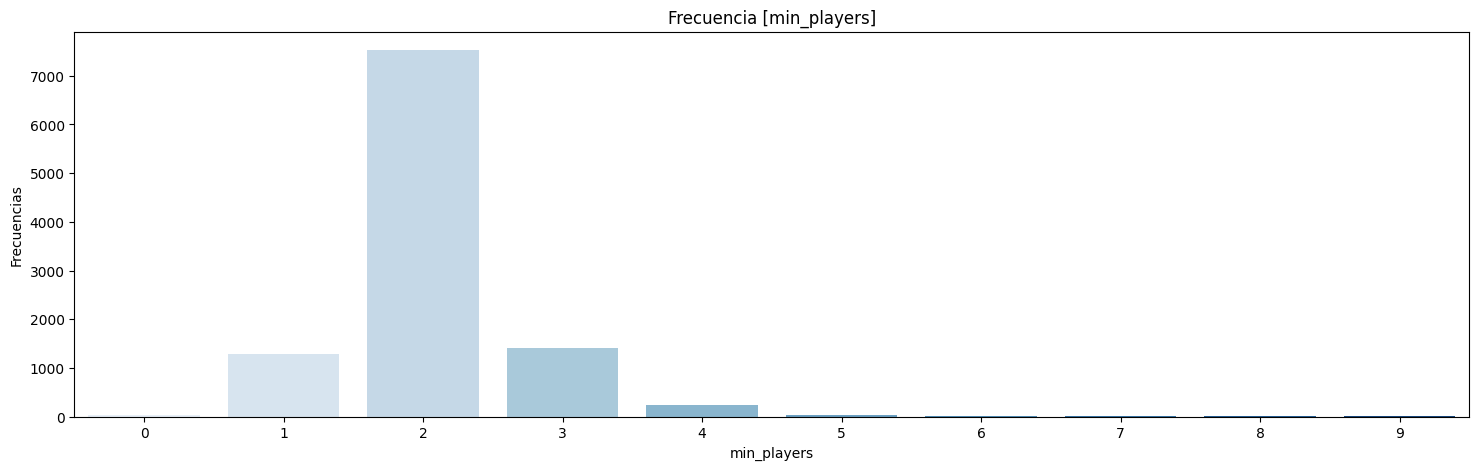

In [20]:
# Revisando atributo "min_players"
atributo_minPlayers = boardGames.file_dataset['min_players']

frecuencias = atributo_minPlayers.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_minPlayers.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [min_players]", "min_players", "Frecuencias" )

[  240    30    60    90    20   120    45    25     5   360   200   340
   180   300     0    40   150   480    15    75  6000  2480    70    10
  1200    50   210    80  1440   100   270   420  4320   960  3600 60000
     6  5400   720 12000  1500     1  3000   600    35    12  4500  1800
    23   105   160   900     2     3    55    33 17280   135  2880   500
    13   400   140  1000   450    39   750    95    68     8    16     4
    42    11]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


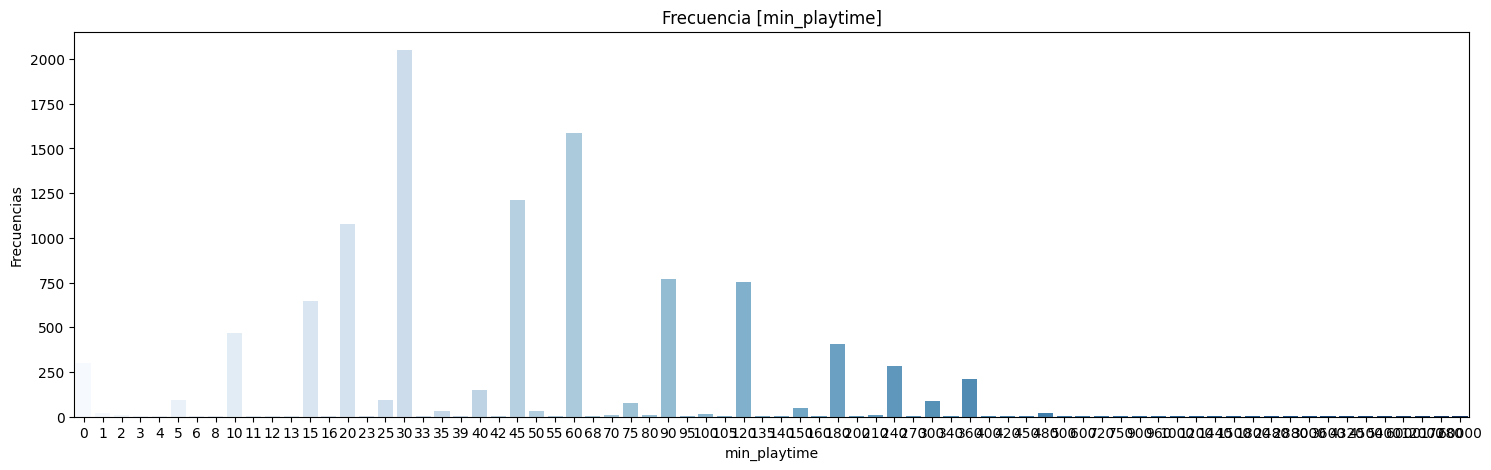

In [21]:
# Revisando atributo "min_playtime"
atributo_minPlaytime = boardGames.file_dataset['min_playtime']

frecuencias = atributo_minPlaytime.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_minPlaytime.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [min_playtime]", "min_playtime", "Frecuencias" )

[  240    30    60    90    20   120    45    25     5   360   200   340
   180   300     0    40   150   480    15    75 12000  2480    70    10
  1200   100   210    80  6000  1440   270    35    50   420  4320   960
  3600 60000   720     6  5400  2880  1500   700     1  3000   600    12
  4500  1800    23  2400   105   160   900     2     3    55   222    33
   135 17280   540   500    13   400   140  1000   108    39   750    95
    68    32   125   165   290     4   115   130    42    11    19]


<ipython-input-10-7a698d164ed4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = valoresX, y = valoresY, ax = ax, palette = Color, legend = False ) # Creando gráfica de barras


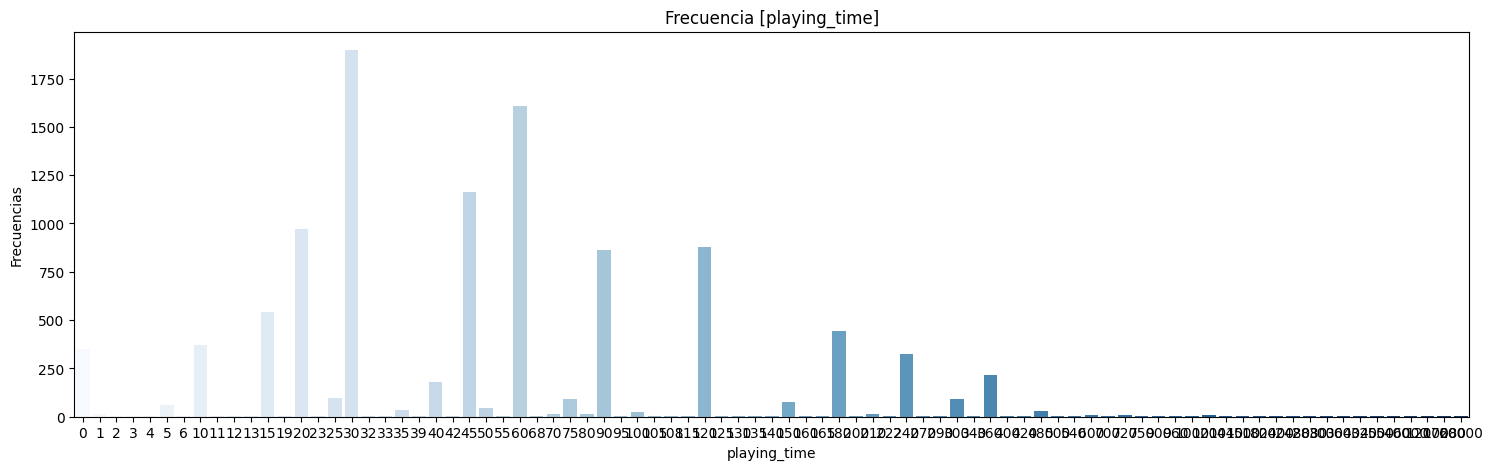

In [22]:
# Revisando atributo "playing_time"
atributo_playingTime = boardGames.file_dataset['playing_time']

frecuencias = atributo_playingTime.value_counts() # Frecuencia que tiene cada valor único de la columna
print( atributo_playingTime.unique() ) # Obteniendo los valores únicos que tiene la columna

# Generando gráfica
graphics.grafica_barras( 18, 5, frecuencias.index, frecuencias.values, "Blues", "Frecuencia [playing_time]", "playing_time", "Frecuencias" )

In [23]:
# Revisando el atributo "category". Este atributo será nuestra variable objetivo para clasificar en el modelo de aprendizaje

"""
Se divide la cadena a partir de la coma y se guarda en una lista
Por ejemplo:
- dato 1: "video game, fantasy, political"
- [video game, fantasy, political] -> Se hace con cada dato
- Se obtiene una lista que contiene listas adentro [ [video game, fantasy, political], [video game, fantasy, political], ... ]
"""
lista_sublistas = boardGames.file_dataset['category'].str.split(',')

lista_sublistas = lista_sublistas.dropna() # Eliminando los valores Nan

# Sacando cada valor de sublista para guardarlos en una lista principal
categories = []

for sublista in lista_sublistas:
  for category in sublista:
      categories.append( category )

# Convirtiendo lista a una serie para aplicar el método unique() y value_counts()
categories_series = pd.Series( categories )

['Economic' 'Negotiation' 'Political' 'Card Game' 'Fantasy'
 'Abstract Strategy' 'Medieval' 'Ancient' 'Civilization' 'Nautical'
 'Exploration' 'Travel' 'Farming' 'Mythology' 'Bluffing' 'Science Fiction'
 'Collectible Components' 'Dice' 'Fighting' 'Print & Play' 'Miniatures'
 'Racing' 'American West' 'City Building' 'Adventure' 'Wargame'
 'Space Exploration' 'Renaissance' 'Humor' 'Electronic' 'Horror'
 'Novel-based' 'Deduction' 'Word Game' 'Territory Building'
 'Aviation / Flight' 'Maze' 'Puzzle' 'Real-time' 'Trivia'
 'Industry / Manufacturing' 'Party Game' 'World War II'
 'American Civil War' 'Age of Reason' 'Movies / TV / Radio theme'
 'World War I' 'Trains' 'Animals' "Children's Game" 'Pirates'
 'Murder/Mystery' 'Transportation' 'Prehistoric' 'Action / Dexterity'
 'Sports' 'Game System' 'Spies/Secret Agents' 'Educational' 'Medical'
 'Mafia' 'Zombies' 'Comic Book / Strip' 'Napoleonic' 'Civil War'
 'American Indian Wars' 'American Revolutionary War' 'Post-Napoleonic'
 'Book' 'Music' 'A

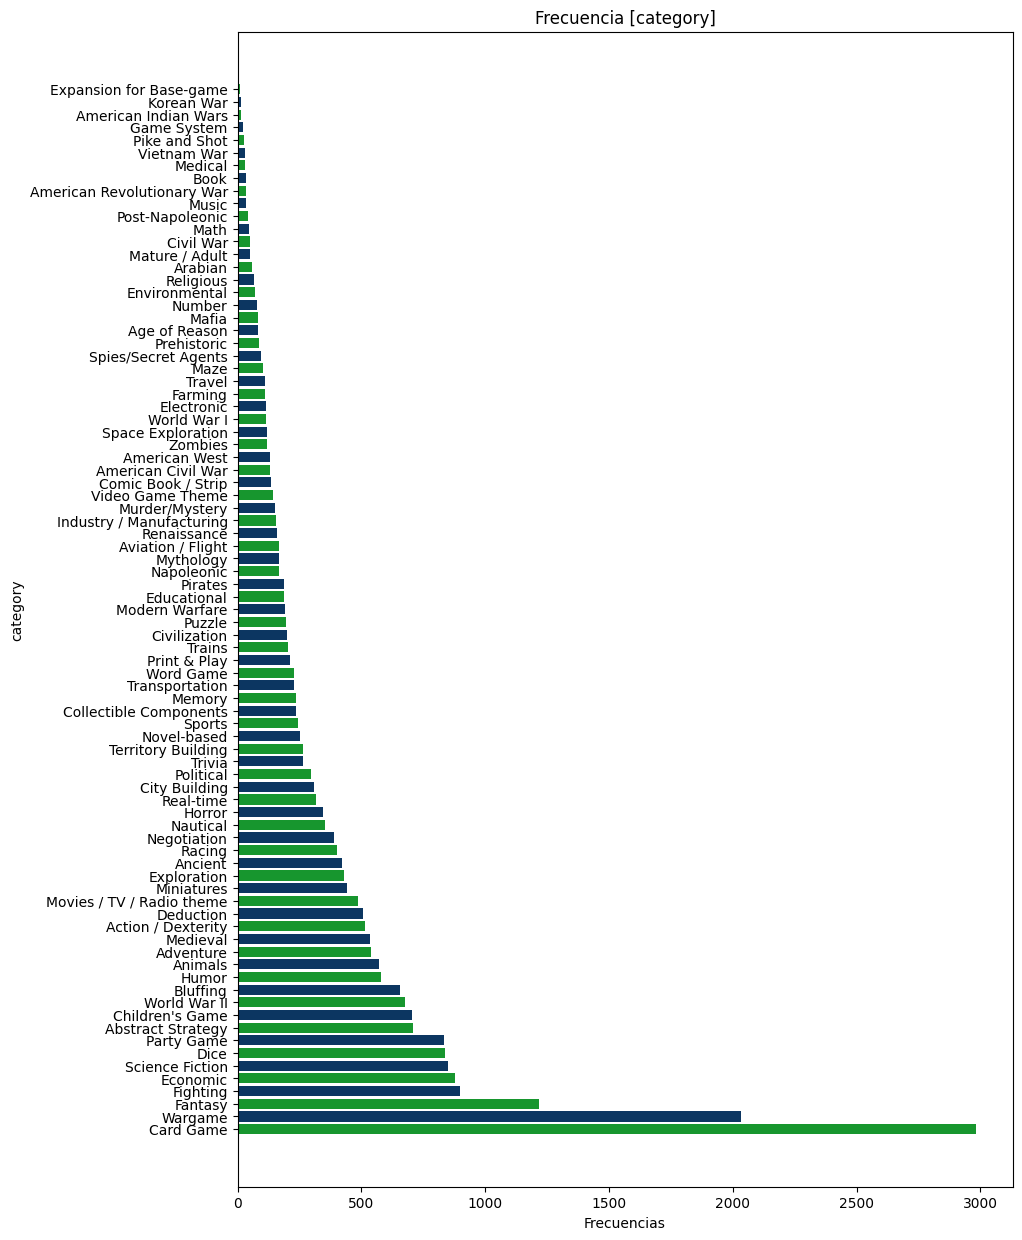

In [24]:
frecuencias = categories_series.value_counts() # Frecuencia que tiene cada valor único de la columna
print( categories_series.unique() ) # Obteniendo los valores únicos que tiene la columna
print( len( categories_series.unique() ) )

# Generando gráfica
graphics.grafica_barras_vertical( 10, 15, frecuencias.index, frecuencias.values, "Frecuencia [category]", "Frecuencias", "category", )

In [25]:
# Colocando sub-categorías a categorías más generales
new_categories = {
    'Strategy and Tactics': {
        'Abstract Strategy',
        'Territory Building',
        'City Building',
        'Deduction',
        'Game System',
        'Bluffing',
        'Wargame'
    },
    'Historical and Warfare': {
        'Medieval',
        'Ancient',
        'Civilization',
        'American Civil War',
        'World War II',
        'World War I',
        'Napoleonic',
        'Civil War',
        'American Indian Wars',
        'American Revolutionary War',
        'Post-Napoleonic',
        'Age of Reason',
        'Vietnam War',
        'Korean War',
        'Pike and Shot',
        'Renaissance',
        'Prehistoric'
    },
    'Fantasy, Mythology and Sci-Fi': {
        'Fantasy',
        'Mythology',
        'Science Fiction',
        'Space Exploration',
        'Horror'
    },
    'Exploration and Adventure': {
        'Exploration',
        'Travel',
        'Adventure',
        'Pirates',
        'Maze',
        'Nautical',
        'Animals'
    },
    'Economic and Development': {
        'Economic',
        'Industry / Manufacturing',
        'Farming',
        'Transportation',
        'Environmental'
    },
    'Social and Cultural': {
        'Negotiation',
        'Political',
        'Party Game',
        'Humor',
        'Music',
        'Religious',
        'Math',
        'Educational',
        'Memory',
        'Arabian',
        'American West',
        'Novel-based',
        'Movies / TV / Radio theme',
        'Book',
        'Comic Book / Strip',
        'Mature / Adult',
        'Murder/Mystery'
    },
    'Card, Dice, and Board Games': {
        'Card Game',
        'Dice',
        'Collectible Components',
        'Word Game',
        'Number',
        'Print & Play',
        'Trivia',
        'Puzzle'
    },
    'Action and Dexterity': {
        'Action / Dexterity',
        'Fighting',
        'Sports',
        'Racing',
        'Real-time',
        'Miniatures'
    },
    'Games for Children': {
        "Children's Game"
    },
    'Technology and Science': {
        'Electronic',
        'Medical',
        'Video Game Theme'
    },
    'Modern Conflicts': {
        'Modern Warfare',
        'Mafia',
        'Zombies'
    },
    'Transport and Technology': {
        'Aviation / Flight',
        'Trains',
        'Spies/Secret Agents'
    }
}

# Creando diccionario para asignar un peso numérico a la variable categórica
diccionario_categorias_numericas = {
    'Strategy and Tactics': 1,
    'Historical and Warfare': 2,
    'Fantasy, Mythology and Sci-Fi': 3,
    'Exploration and Adventure': 4,
    'Economic and Development': 5,
    'Social and Cultural': 6,
    'Card, Dice, and Board Games': 7,
    'Action and Dexterity': 8,
    'Games for Children': 9,
    'Technology and Science': 10,
    'Modern Conflicts': 11,
    'Transport and Technology': 12,
}

In [26]:
# Creando copia del dataset - IMPORTANTE
boarGames_copy = boardGames.file_dataset.copy()

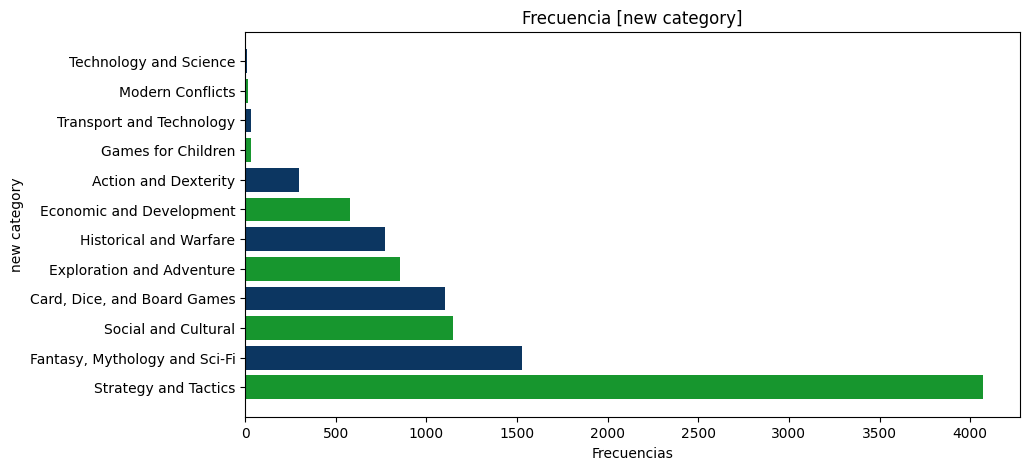

In [27]:
# Aplicando categorías generales a la columna "category"
def apply_mapping( category ):
    if pd.isna( category ):
        return None  # Si el valor es NaN, retorna None
    for main_category, sub_categories in new_categories.items():
        for sub_category in sub_categories:
            if sub_category in category: # Retorna la primera categoría principal o general si coinciden con la primera categoría
                return main_category
    return None  # Si ninguna categoría coincide, retorna None

# Aplicando función "apply_mapping" a cada dato de la columna
boarGames_copy['category'] = boarGames_copy['category'].dropna().map( apply_mapping )

# Obteniendo las frecuencias por cada categoría nueva
frecuencias = boarGames_copy['category'].value_counts()

# Generando gráfica
graphics.grafica_barras_vertical( 10, 5, frecuencias.index, frecuencias.values, "Frecuencia [new category]", "Frecuencias", "new category", )

In [28]:
"""
Con la gráfica anterior, se puede observar que hay una clase de la variable objetivo "strategy and tatics" que contiene una gran diferencia de cantidad
de datos a diferencia de las otras clases. Por lo tanto, hay que aplicar métodos de sobremuestreo o submuestreo.
"""

'\nCon la gráfica anterior, se puede observar que hay una clase de la variable objetivo "strategy and tatics" que contiene una gran diferencia de cantidad\nde datos a diferencia de las otras clases. Por lo tanto, hay que aplicar métodos de sobremuestreo o submuestreo.\n'

In [29]:
# Modificando la variable categórica "category" a variable numérica
boarGames_copy['category'] = boarGames_copy['category'].replace( diccionario_categorias_numericas )

In [30]:
# Obteniendo atributos numéricos del dataset. LOS NECESARIOS PARA NUESTRO MODELO
dataset = boarGames_copy[["max_players", "max_playtime", "min_age", "min_players", "min_playtime", "playing_time", "year_published", "average_rating", "category"]]

dataset

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,category
0,5,240,14,3,240,240,1986,7.66508,5.0
1,4,30,12,3,30,30,1981,6.60815,3.0
2,4,60,10,2,30,60,1998,7.44119,1.0
3,4,60,12,2,60,60,1992,6.60675,2.0
4,6,90,12,3,90,90,1964,7.35830,5.0
...,...,...,...,...,...,...,...,...,...
10527,2,480,12,1,30,480,2016,8.35333,1.0
10528,5,45,13,2,45,45,2016,8.08780,3.0
10529,4,20,12,2,20,20,2016,7.28016,7.0
10530,6,120,12,2,20,120,2016,7.45871,3.0


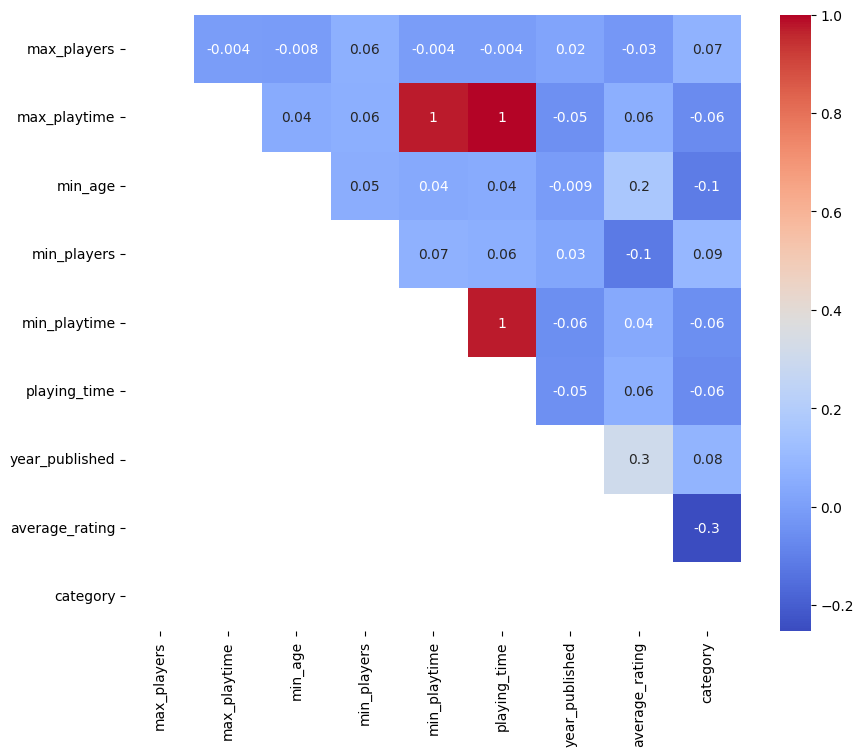

In [31]:
"""
Revisando relaciones o correlaciones entre las variables numéricas.
Se usará un mapa de calor o matriz de correlación.
"""
matriz_correlacion = dataset.corr()

#Creando gráfica de correlación
fig, ax = plt.subplots( figsize = ( 10, 8 ) ) # Definiendo lienzo
mascara = np.tril( matriz_correlacion ) # Creando mascara para el mapa de calor
sns.heatmap( matriz_correlacion, cmap = "coolwarm", annot = True, fmt = '.1g' ,square = True, mask = mascara );

### **1.3. Preparando el dataset**

#### 1.3.1. Seleccionando atributos o columnas

In [32]:
# Realizando una copia del dataset original para modificar elementos
boardGames_new = boardGames.file_dataset.copy()

# Escogiendo las columnas a trabajar para el modelo
boardGames_new = boardGames_new[["max_players", "max_playtime", "min_age", "min_players", "min_playtime", "playing_time", "year_published", "average_rating", "category"]]

# Eliminando valores nulos o nan que tenga el dataset
boardGames_new = boardGames_new.dropna()

# Revisando dataset modificado
boardGames_new.head(5)

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,category
0,5,240,14,3,240,240,1986,7.66508,"Economic,Negotiation,Political"
1,4,30,12,3,30,30,1981,6.60815,"Card Game,Fantasy"
2,4,60,10,2,30,60,1998,7.44119,"Abstract Strategy,Medieval"
3,4,60,12,2,60,60,1992,6.60675,Ancient
4,6,90,12,3,90,90,1964,7.35830,Economic


In [33]:
# Convirtiendo column "average_rating" a tipo int con valor redondeado
boardGames_new['average_rating'] = boardGames_new['average_rating'].round().astype(int)

# Revisando dataset
boardGames_new.head(10)

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,category
0,5,240,14,3,240,240,1986,8,"Economic,Negotiation,Political"
1,4,30,12,3,30,30,1981,7,"Card Game,Fantasy"
2,4,60,10,2,30,60,1998,7,"Abstract Strategy,Medieval"
3,4,60,12,2,60,60,1992,7,Ancient
4,6,90,12,3,90,90,1964,7,Economic
5,6,240,12,2,240,240,1989,7,"Civilization,Nautical"
6,2,20,8,2,20,20,1978,7,Abstract Strategy
7,5,120,12,2,120,120,1993,6,"Civilization,Fantasy"
8,4,90,13,2,90,90,1998,7,Exploration
9,6,60,10,2,60,60,1998,7,"Fantasy,Travel"


#### 1.3.2. Convirtiendo la variable "category" a categorías generales

In [34]:
# Modificando la columna "category" para obtener categorías más generales
boardGames_new['category'] = boardGames_new['category'].map( apply_mapping )

# Revisando dataset
boardGames_new.head(10)

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,category
0,5,240,14,3,240,240,1986,8,Economic and Development
1,4,30,12,3,30,30,1981,7,"Fantasy, Mythology and Sci-Fi"
2,4,60,10,2,30,60,1998,7,Strategy and Tactics
3,4,60,12,2,60,60,1992,7,Historical and Warfare
4,6,90,12,3,90,90,1964,7,Economic and Development
5,6,240,12,2,240,240,1989,7,Historical and Warfare
6,2,20,8,2,20,20,1978,7,Strategy and Tactics
7,5,120,12,2,120,120,1993,6,Historical and Warfare
8,4,90,13,2,90,90,1998,7,Exploration and Adventure
9,6,60,10,2,60,60,1998,7,"Fantasy, Mythology and Sci-Fi"


#### 1.3.3. Aplicando normalización a las variables numéricas

In [35]:
# Instanciando objeto para aplicar normalización
scaler = MinMaxScaler()

# Separando el dataset
boardGames_predictoras = boardGames_new.drop( "category", axis = 1 ) # Elimando la variable objetivo
boardGames_objetivo = boardGames_new['category'] # Obteniendo la columna de la variable objetivo

# Aplicando proceso de normalización
boardGames_predictoras = pd.DataFrame( scaler.fit_transform( boardGames_predictoras ), columns = boardGames_predictoras.columns )

boardGames_predictoras.reset_index(drop=True, inplace=True)
boardGames_objetivo.reset_index(drop=True, inplace=True)

# Obteniendo dataset normalizado
boardGames_new_normalizado = pd.concat( [ boardGames_predictoras, boardGames_objetivo ], axis = 1 )

# Revisando el dataset
boardGames_new_normalizado.head(10)

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,category
0,0.005005,0.004000,0.333333,0.333333,0.004000,0.004000,0.545455,0.875,Economic and Development
1,0.004004,0.000500,0.285714,0.333333,0.000500,0.000500,0.469697,0.750,"Fantasy, Mythology and Sci-Fi"
2,0.004004,0.001000,0.238095,0.222222,0.000500,0.001000,0.727273,0.750,Strategy and Tactics
3,0.004004,0.001000,0.285714,0.222222,0.001000,0.001000,0.636364,0.750,Historical and Warfare
4,0.006006,0.001500,0.285714,0.333333,0.001500,0.001500,0.212121,0.750,Economic and Development
5,0.006006,0.004000,0.285714,0.222222,0.004000,0.004000,0.590909,0.750,Historical and Warfare
6,0.002002,0.000333,0.190476,0.222222,0.000333,0.000333,0.424242,0.750,Strategy and Tactics
7,0.005005,0.002000,0.285714,0.222222,0.002000,0.002000,0.651515,0.625,Historical and Warfare
8,0.004004,0.001500,0.309524,0.222222,0.001500,0.001500,0.727273,0.750,Exploration and Adventure
9,0.006006,0.001000,0.238095,0.222222,0.001000,0.001000,0.727273,0.750,"Fantasy, Mythology and Sci-Fi"


#### 1.3.4. Observaciones desequilibradas

*   Se encontró que ciertas categorías ostentaban una gran diferencia de cantidad de datos que otras categorías. Esto puede generar un sesgo importante en el modelo. Por tanto, se aplicara el proceso de sobremuestreo usando la técnica SMOTE.

* Revisar el siguiente link: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c



In [36]:
# Instanciando un objeto de la clase SMOTE
smote = SMOTE( random_state=42 )

y = boardGames_new_normalizado['category'] # Variable dependiente
X = boardGames_new_normalizado.drop( columns=['category'] ) # Variables independientes

# Aplicando técnica a los datos
X_resampled, y_resampled = smote.fit_resample( X, y )

# Revisando la cantidad de datos sobremuestreados
y_resampled.value_counts()

category
Economic and Development         4072
Fantasy, Mythology and Sci-Fi    4072
Strategy and Tactics             4072
Historical and Warfare           4072
Exploration and Adventure        4072
Social and Cultural              4072
Card, Dice, and Board Games      4072
Action and Dexterity             4072
Transport and Technology         4072
Modern Conflicts                 4072
Games for Children               4072
Technology and Science           4072
Name: count, dtype: int64

#### 1.3.5. Datos de entrenamiento y prueba

In [37]:
# Importando librería para trabajar
from sklearn.model_selection import train_test_split

# Sacando datos de entrenamiento y prueba. Escogiendo el 20% de datos como prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

y_train.value_counts()

category
Exploration and Adventure        3305
Social and Cultural              3288
Action and Dexterity             3278
Modern Conflicts                 3277
Fantasy, Mythology and Sci-Fi    3272
Card, Dice, and Board Games      3259
Games for Children               3258
Historical and Warfare           3252
Economic and Development         3238
Technology and Science           3233
Transport and Technology         3224
Strategy and Tactics             3207
Name: count, dtype: int64

### **1.4. Aplicando modelos de aprendizaje automático**

In [38]:
"""
Aplicando módelo de aprendizaje K-Nearest Neighbors (KNN)
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.neighbors import KNeighborsClassifier

#Creando un objeto del modelo
knn = KNeighborsClassifier( n_neighbors = 53 )

#Entrenando el modelo con los datos de entrenamiento
knn.fit( X_train, y_train )

#Realizando proceso de clasificación con el modelo entrenado
knn_predict = knn.predict( X_test )

In [39]:
"""
Aplicando el módelo de aprendizaje Naive Bayes
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#Creando un objeto del modelo
mnb = MultinomialNB()

#Entrenando el modelo con los datos de entrenamiento
mnb.fit( X_train, y_train )

#Realizando proceso de clasificación con el modelo obtenido
mnb_predict = mnb.predict( X_test )

In [40]:
"""
Aplicando el módelo de aprendizaje Random Forest
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.ensemble import RandomForestClassifier

#Creando un objeto del modelo a trabajar
rfc = RandomForestClassifier( n_estimators = 100 ,random_state = 0 )

#Entrenando el modelo establecido con el conjunto de datos de entrenamiento
rfc.fit( X_train, y_train )

#Realizando proceso de clasificación con el modelo entrenado
rfc_predict = rfc.predict( X_test )

In [41]:
"""
Aplicando el módelo de aprendizaje AdaBoost
Modelo de aprendizaje supervisado
"""

#Importando librería para aplicar el modelo
from sklearn.ensemble import AdaBoostClassifier

#Creando un objeto del modelo
abc = AdaBoostClassifier( n_estimators = 100, learning_rate = 1, random_state = 0 )

#Entrenando el modelo con el conjunto de datos de entrenamiento
abc.fit( X_train, y_train )

#Realizando un proceso de clasificación con el modelo entrenado
abc_predict = abc.predict( X_test )

### 1.5. Evaluando los modelos de aprendizaje

In [42]:
#Importando librerías de trabajo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Precisión de (KNN) cuando (K = 53) es: 52.21528701524608%


<Axes: >

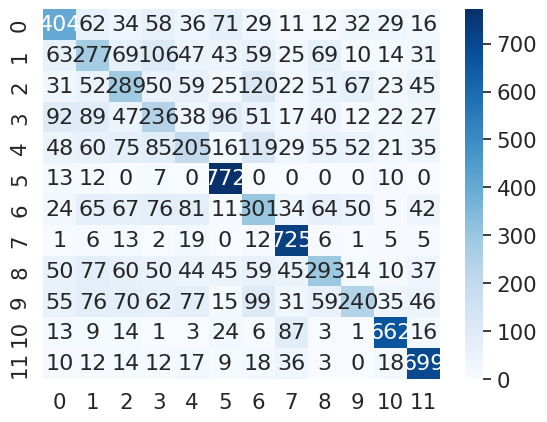

In [43]:
"""
Modelo: KNN
"""

#Revisando la exactitud de clasificación del modelo
print(f"Precisión de (KNN) cuando (K = 53) es: {accuracy_score(y_test, knn_predict)*100}%")

#Matriz de confusión
matriz_confusion = confusion_matrix(y_test, knn_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

Precisión de (NB) es: 19.021794740611888%


<Axes: >

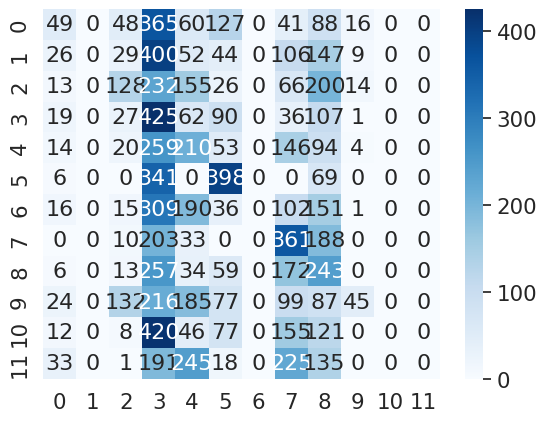

In [44]:
"""
Modelo: Naive Bayes (NB)
"""

#Revisando la exactitud del modelo
print(f"Precisión de (NB) es: {accuracy_score(y_test, mnb_predict)*100}%")

#Obteniendo matriz de confusión
matriz_confusion_nb = confusion_matrix(y_test, mnb_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_nb, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

Exactitud de (RF) es: 75.53463624270951%


<Axes: >

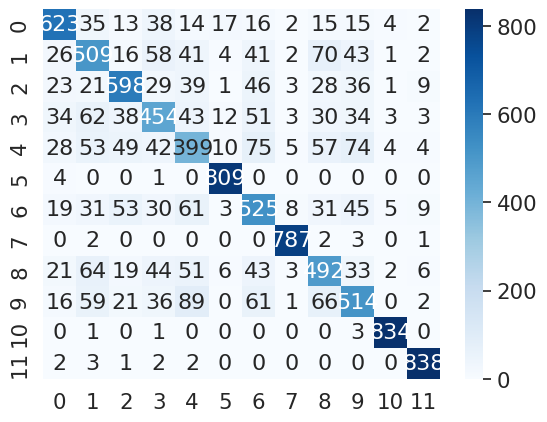

In [45]:
"""
Modelo: Random Forest (RF)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (RF) es: {accuracy_score(y_test, rfc_predict)*100}%")

#Matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, rfc_predict)

#Creando gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_rf, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

Exactitud de (AB) es: 25.31464238207306%


<Axes: >

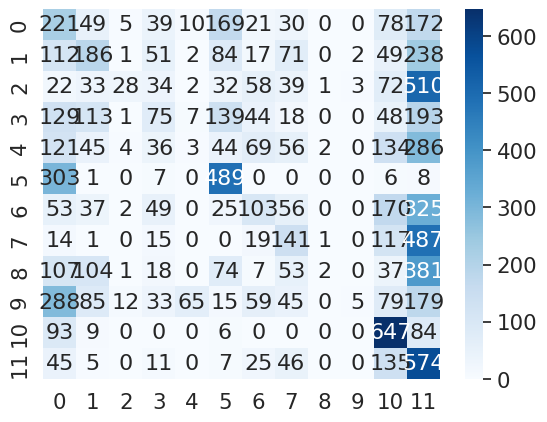

In [46]:
"""
Modelo: AdaBoost (AB)
"""

#Revisando la exactitud del modelo
print(f"Exactitud de (AB) es: {accuracy_score(y_test, abc_predict)*100}%")

#Matriz de confusión
matriz_confusion_ab = confusion_matrix(y_test, abc_predict)

#Obteniendo gráfica de la matriz
sns.set(font_scale = 1.4)
sns.heatmap(matriz_confusion_ab, annot = True, annot_kws = {"size": 16}, cmap = "Blues", fmt = 'g')

### **1.6. Exportando modelo de aprendizaje**

* Se importará el modelo de Random Forest, ya que obtuvo el porcentaje de precisión más alta.

* Revisar este contenido donde se explica la exportación de un modelo de aprendizaje automático: https://www.youtube.com/watch?v=hd3DC9gpDR8

In [47]:
# Importando librería para guardar modelo
import joblib

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
# Guardando modelo
joblib.dump( rfc, "/content/drive/My Drive/Modelos_Aprendizajes/modelo_randomForest.pkl" )

['/content/drive/My Drive/Modelos_Aprendizajes/modelo_randomForest.pkl']